In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | inuvik
Processing Record 8 of Set 1 | vao
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | kozhva
Processing Record 11 of Set 1 | itarema
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | fevralsk
City not found. Skipping...
Processing Record 14 of Set 1 | san luis
Processing Record 15 of Set 1 | yemelyanovo
Processing Record 16 of Set 1 | roald
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | vyazma
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | port alfred
Processing Record 22 o

Processing Record 35 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 36 of Set 4 | montes claros
Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | port hardy
Processing Record 39 of Set 4 | olafsvik
Processing Record 40 of Set 4 | bereda
Processing Record 41 of Set 4 | chardara
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | alice springs
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | husavik
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | bati
Processing Record 1 of Set 5 | havre-saint-pierre
Processing Record 2 of Set 5 | mujiayingzi
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | san felipe
Processing Record 5 of Set 

Processing Record 24 of Set 8 | hay river
Processing Record 25 of Set 8 | urumqi
Processing Record 26 of Set 8 | tazovskiy
Processing Record 27 of Set 8 | gat
Processing Record 28 of Set 8 | gewane
Processing Record 29 of Set 8 | ola
Processing Record 30 of Set 8 | lincoln
Processing Record 31 of Set 8 | chara
Processing Record 32 of Set 8 | bilma
Processing Record 33 of Set 8 | makokou
Processing Record 34 of Set 8 | buala
Processing Record 35 of Set 8 | sorland
Processing Record 36 of Set 8 | constitucion
Processing Record 37 of Set 8 | bethel
Processing Record 38 of Set 8 | cuddapah
Processing Record 39 of Set 8 | bulungu
Processing Record 40 of Set 8 | kamaishi
Processing Record 41 of Set 8 | avera
Processing Record 42 of Set 8 | dinguiraye
Processing Record 43 of Set 8 | makinsk
Processing Record 44 of Set 8 | sofiyivka
Processing Record 45 of Set 8 | troitskoye
Processing Record 46 of Set 8 | bardiyah
Processing Record 47 of Set 8 | sao joao da barra
Processing Record 48 of Set 8

Processing Record 16 of Set 12 | ketchikan
Processing Record 17 of Set 12 | general cepeda
Processing Record 18 of Set 12 | margherita
Processing Record 19 of Set 12 | westport
Processing Record 20 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 21 of Set 12 | ranong
Processing Record 22 of Set 12 | pinawa
Processing Record 23 of Set 12 | koboldo
City not found. Skipping...
Processing Record 24 of Set 12 | riyadh
Processing Record 25 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 26 of Set 12 | babstovo
Processing Record 27 of Set 12 | westpunt
City not found. Skipping...
Processing Record 28 of Set 12 | homer
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 12 | arandis
Processing Record 33 of Set 12 | bokoro
Processing Record 34 of Set 12 | las vegas
Processing Record 35 of Set 12 | te anau
Processing Record 36 of Set 12 | m

In [10]:
len(city_data)

548

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.08,74,0,19.84,PF,2021-09-23 01:09:38
1,Ponta Do Sol,32.6667,-17.1000,72.23,65,100,4.56,PT,2021-09-23 01:09:39
2,Hamilton,39.1834,-84.5333,56.05,94,90,1.01,US,2021-09-23 01:06:07
3,Punta Arenas,-53.1500,-70.9167,41.11,70,0,17.27,CL,2021-09-23 01:09:39
4,Avarua,-21.2078,-159.7750,75.25,60,20,9.22,CK,2021-09-23 01:08:07
5,Nikolskoye,59.7035,30.7861,45.01,84,100,3.62,RU,2021-09-23 01:09:40
6,Inuvik,68.3499,-133.7218,36.57,53,100,11.52,CA,2021-09-23 01:08:45
7,Vao,-22.6667,167.4833,68.86,61,5,20.65,NC,2021-09-23 01:09:41
8,Bluff,-46.6000,168.3333,56.80,73,79,8.97,NZ,2021-09-23 01:09:41
9,Kozhva,65.1073,57.0459,32.61,92,1,2.39,RU,2021-09-23 01:09:41


In [12]:
new_column_order = ["City", "Country", "Date", 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-23 01:09:38,-23.1203,-134.9692,74.08,74,0,19.84
1,Ponta Do Sol,PT,2021-09-23 01:09:39,32.6667,-17.1000,72.23,65,100,4.56
2,Hamilton,US,2021-09-23 01:06:07,39.1834,-84.5333,56.05,94,90,1.01
3,Punta Arenas,CL,2021-09-23 01:09:39,-53.1500,-70.9167,41.11,70,0,17.27
4,Avarua,CK,2021-09-23 01:08:07,-21.2078,-159.7750,75.25,60,20,9.22
5,Nikolskoye,RU,2021-09-23 01:09:40,59.7035,30.7861,45.01,84,100,3.62
6,Inuvik,CA,2021-09-23 01:08:45,68.3499,-133.7218,36.57,53,100,11.52
7,Vao,NC,2021-09-23 01:09:41,-22.6667,167.4833,68.86,61,5,20.65
8,Bluff,NZ,2021-09-23 01:09:41,-46.6000,168.3333,56.80,73,79,8.97
9,Kozhva,RU,2021-09-23 01:09:41,65.1073,57.0459,32.61,92,1,2.39


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

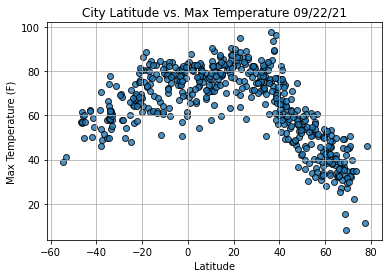

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

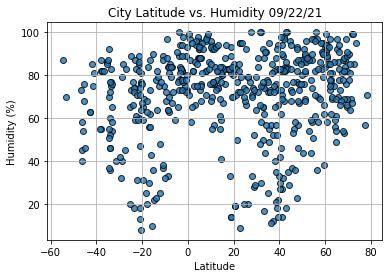

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

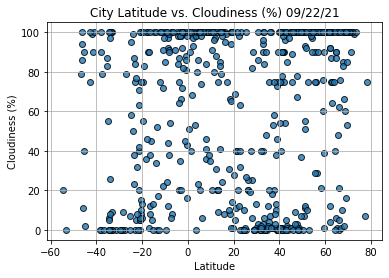

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

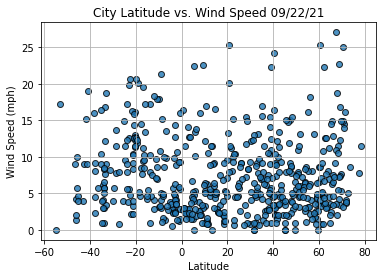

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ponta Do Sol,PT,2021-09-23 01:09:39,32.6667,-17.1000,72.23,65,100,4.56
2,Hamilton,US,2021-09-23 01:06:07,39.1834,-84.5333,56.05,94,90,1.01
5,Nikolskoye,RU,2021-09-23 01:09:40,59.7035,30.7861,45.01,84,100,3.62
6,Inuvik,CA,2021-09-23 01:08:45,68.3499,-133.7218,36.57,53,100,11.52
9,Kozhva,RU,2021-09-23 01:09:41,65.1073,57.0459,32.61,92,1,2.39


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

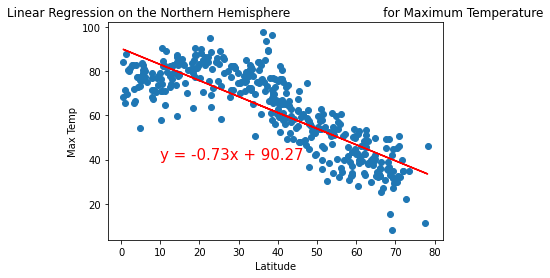

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

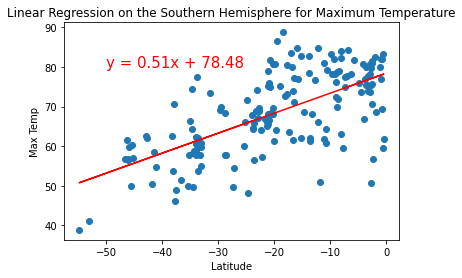

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

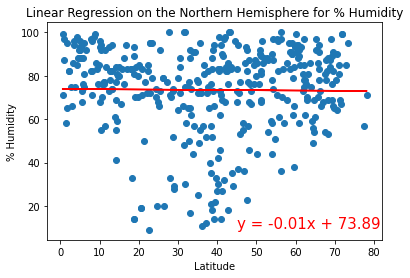

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

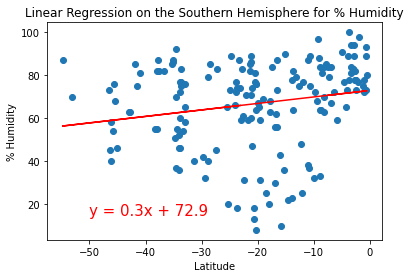

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

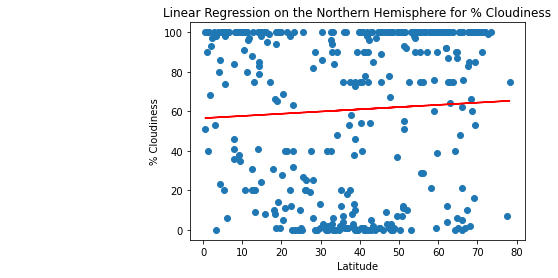

In [52]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

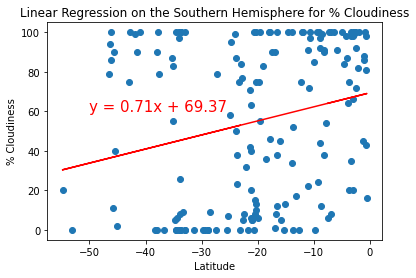

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

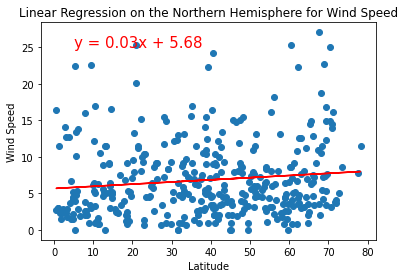

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(5,25))

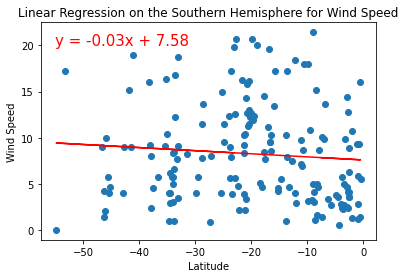

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,20))